# Creating a Convnet


In [1]:
import tensorflow as tf

from tensorflow.keras import  datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load and split Dataset

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

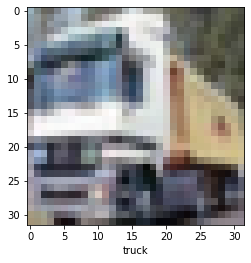

In [3]:
# lets look at one image

IMG_INDEX = 1 # change this to look at other images

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [4]:
# Building the Convolutional Base

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2, 2)) 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))    
model.add(layers.MaxPooling2D(2, 2))              
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          18464     
Total params: 37,856
Trainable params: 37,856
Non-trainable params: 0
_________________________________________________________________


# Adding Dense Layers 

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

# Training

In [8]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )
histiry = model.fit(train_images, train_labels, epochs=4,
                   validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 30s 19ms/step - loss: 1.6034 - accuracy: 0.4108 - val_loss: 1.3255 - val_accuracy: 0.5206
Epoch 2/4
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2534 - accuracy: 0.5508 - val_loss: 1.1476 - val_accuracy: 0.5884
Epoch 3/4
1563/1563 [==============================] - 40s 26ms/step - loss: 1.0980 - accuracy: 0.6094 - val_loss: 1.1082 - val_accuracy: 0.6066
Epoch 4/4
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0112 - accuracy: 0.6402 - val_loss: 1.0185 - val_accuracy: 0.6407


# Evaluating the Model

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 1.0185 - accuracy: 0.6407
0.6406999826431274
